# Early Stage Diabetes Prediction Model


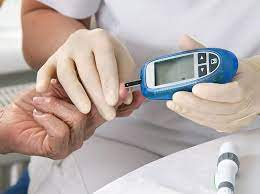

###### About Data
This dataset contains the sign and symptpom data of newly diabetic or would be diabetic patient.

## Features of the dataset
The dataset consist of total **16** features and one target variable named 'class'.

**1. Age:** Age in years ranging from (20years to 65 years)<br>
**2. Gender:** Male / Female<br>
**3. Polyuria:** Yes / No<br>
**4. Polydipsia:** Yes/ No<br>
**5. Sudden weight loss:** Yes/ No <br>
**6. Weakness:** Yes/ No<br>
**7. Polyphagia:** Yes/ No<br>
**8. Genital Thrush:** Yes/ No<br>
**9. Visual blurring:** Yes/ No<br>
**10. Itching:** Yes/ No<br>
**11. Irritability:** Yes/No<br>
**12. Delayed healing:** Yes/ No<br>
**13. Partial Paresis:** Yes/ No<br>
**14. Muscle stiffness:** yes/ No<br>
**15. Alopecia:** Yes/ No<br>
**16. Obesity:** Yes/ No<br>

**Class:** Positive / Negative

## Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import classification_report 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

## Importing Dataset

In [2]:
df = pd.read_csv('C:/Users/HP/OneDrive/Documents/dataset_for_diabetes.csv')
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


## Checking Missing Values

In [3]:
df.isnull().sum()           #returns the total number of the null values present in the respective columns

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [4]:
df.info()                 #returns the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [5]:
df.describe(include='all')    #describes the features of the given dataset

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,NaN,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,NaN,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320
mean,48.028846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,12.151466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,47.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# DATA VISUALISATION

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Distribution of Class')]

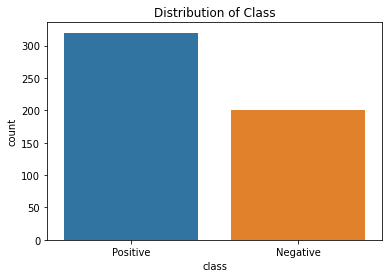

In [6]:
#Distribution of Target Variable

sns.countplot(df['class'],data=df).set(title="Distribution of Class")


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

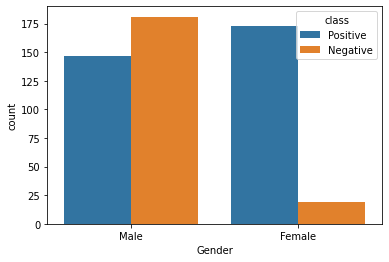

In [7]:
# Distribution of Gender

sns.countplot(df['Gender'],hue=df['class'], data=df)        #grouping positive and negative cases w.r.t gender


<AxesSubplot:>

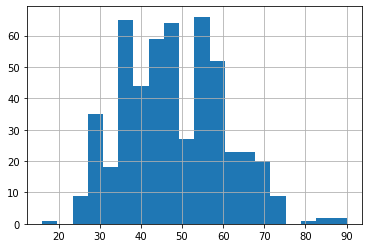

In [8]:
df['Age'].hist(bins=20)               #hist is an inbuilt fnc in pandas

## Data Pre-Processing

In [9]:
#to covert categorical data i.e, male and female to 1 and 0 respectivel
df['Gender'] = df ['Gender'].replace({'Female':0,'Male':1 })

In [10]:
df['Gender']

0      1
1      1
2      1
3      1
4      1
      ..
515    0
516    0
517    0
518    0
519    1
Name: Gender, Length: 520, dtype: int64

In [11]:
# Changing all values of all columns except age, gender and class
for column in df.columns.drop(['Age','Gender','class']):
     df[column]= df[column].replace({'No':0 , 'Yes': 1})
        

In [12]:
# Repacing Postive to 1 and Negative to 0 for class column
df['class'] = df ['class'].replace({'Positive':0,'Negative':1 })

In [13]:
# Separating Target feature
X = df.drop(['class'], axis=1)
y = df['class']

In [14]:
X.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


## Correlation between features

In [15]:
X.corrwith(y)

Age                  -0.108679
Gender                0.449233
Polyuria             -0.665922
Polydipsia           -0.648734
sudden weight loss   -0.436568
weakness             -0.243275
Polyphagia           -0.342504
Genital thrush       -0.110288
visual blurring      -0.251300
Itching               0.013384
Irritability         -0.299467
delayed healing      -0.046980
partial paresis      -0.432288
muscle stiffness     -0.122474
Alopecia              0.267512
Obesity              -0.072173
dtype: float64

## Train and Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 12345)

In [17]:
## checking distribution of target variable in train test split
print('Distribution of target variable in training set')
print(y_train.value_counts())

print('Distribution of target variable in test set')
print(y_test.value_counts())

Distribution of target variable in training set
0    256
1    160
Name: class, dtype: int64
Distribution of target variable in test set
0    64
1    40
Name: class, dtype: int64


In [18]:
X_train.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
112,68,0,1,1,1,0,1,1,1,0,1,1,0,1,1,0
394,59,0,0,0,0,1,0,0,1,1,0,1,0,1,1,1
211,40,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
284,72,1,1,0,0,0,1,0,1,1,0,1,1,1,1,0
358,55,1,1,1,1,1,0,1,0,0,1,0,1,0,0,0


## Data Normalization

In [19]:
minmax = MinMaxScaler()
X_train[['Age']] = minmax.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax.transform(X_test[['Age']])

In [20]:
X_train.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
112,0.661538,0,1,1,1,0,1,1,1,0,1,1,0,1,1,0
394,0.523077,0,0,0,0,1,0,0,1,1,0,1,0,1,1,1
211,0.230769,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
284,0.723077,1,1,0,0,0,1,0,1,1,0,1,1,1,1,0
358,0.461538,1,1,1,1,1,0,1,0,0,1,0,1,0,0,0


## Feature Selection

In [21]:
X.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [22]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


Selection of specific for better accuracy for Random Accuracy.

In [23]:
X_FS = X[['Polyuria', 'Polydipsia','Age', 'Gender','partial paresis','sudden weight loss','Irritability', 'delayed healing','Alopecia','Itching']]

In [24]:
print(X_FS)

     Polyuria  Polydipsia  Age  Gender  partial paresis  sudden weight loss  \
0           0           1   40       1                0                   0   
1           0           0   58       1                1                   0   
2           1           0   41       1                0                   0   
3           0           0   45       1                0                   1   
4           1           1   60       1                1                   1   
..        ...         ...  ...     ...              ...                 ...   
515         1           1   39       0                1                   1   
516         1           1   48       0                1                   1   
517         1           1   58       0                1                   1   
518         0           0   32       0                0                   0   
519         0           0   42       1                0                   0   

     Irritability  delayed healing  Alopecia  Itchi

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_FS, y, test_size = 0.2, stratify=y, random_state = 12345)     

## ALGORTHIMS FOR PREDICTION

In [26]:
# Logistic Regression
logi = LogisticRegression(random_state = 0, penalty = 'l2') #penalty drops the less contributive parameters; imposes penalty for having too many variables
logi.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [27]:
# Model Evaluation
y_predict_logi = logi.predict(X_test)


report=classification_report(y_test,y_predict_logi)

print(report)

              precision    recall  f1-score   support

           0       0.92      0.91      0.91        64
           1       0.85      0.88      0.86        40

    accuracy                           0.89       104
   macro avg       0.89      0.89      0.89       104
weighted avg       0.89      0.89      0.89       104



In [28]:
conf_matrix=confusion_matrix(y_test,y_predict_logi)
print(conf_matrix)

[[58  6]
 [ 5 35]]


In [29]:
acc = accuracy_score(y_test, y_predict_logi)
print(acc)


0.8942307692307693


In [62]:
# Random Forest                                               #ensembler 
rf = RandomForestClassifier(criterion='gini',n_estimators=100)  #criteria: gini  amount of probability of a specific feature that is classified incorrectly when selected randomly
rf.fit(X_train,y_train)                                         #estimators: number of trees

RandomForestClassifier()

In [63]:
# Model Evaluation
y_predict_r = rf.predict(X_test)

report=classification_report(y_test,y_predict_r)
print(report)


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        64
           1       0.95      0.95      0.95        40

    accuracy                           0.96       104
   macro avg       0.96      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104



In [51]:
conf_matrix=confusion_matrix(y_test,y_predict_r)
print(conf_matrix)

[[64  0]
 [ 2 38]]


In [52]:
acc = accuracy_score(y_test, y_predict_r)
print(acc)

0.9807692307692307


In [53]:
#KNN

model_1=KNeighborsClassifier()
model_1.fit(X_train,y_train)

y_predict_knn = model_1.predict(X_test)

report=classification_report(y_test,y_predict_knn)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.81      0.88        64
           1       0.76      0.95      0.84        40

    accuracy                           0.87       104
   macro avg       0.86      0.88      0.86       104
weighted avg       0.88      0.87      0.87       104



In [54]:
conf_matrix=confusion_matrix(y_test,y_predict_knn)
print(conf_matrix)

[[52 12]
 [ 2 38]]


In [55]:
acc = accuracy_score(y_test, y_predict_knn)
print(acc)

0.8653846153846154
